In [973]:
import gym
import distributions
import portfolio
import importlib
import unittests
importlib.reload(distributions)
importlib.reload(portfolio)
importlib.reload(unittests)

%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [974]:
unittests.run_tests()

Tests have run successfully.


In [975]:
# Create the gym environment for the portfolio
env = portfolio.PortfolioEnv(                  
                              n_risky_assets=1,
                              objective='total-wealth',
                              benchmark_weights=None,
                              utility_fun=None, 
                              trans_costs=0.0,
                              min_short=0.0,
                              max_long=1.0,
                              n_periods_per_year=12,
                              n_years=10,
                              is_static=True,
                              asset_process_name='lognormal-static'
                            )

In [976]:
# Set a custom asset process, with a custom probability distribution on the assets
# Get the parameters for a lognormal distribution with the desired properties
asset_process = distributions.LognormalStaticProcess( 
                                           np_random = np.random.RandomState(42), 
                                           n_risky_assets=1, 
                                           n_periods_per_year=12 )
eq_risk_premium = 0.04
ann_vol = 0.15
distrib_params = dict( mu=[eq_risk_premium], sigma=[[ann_vol ** 2]] )
asset_process.set_distribution(distrib_params)
obs = env.set_asset_process(asset_process)

In [977]:
%%time
n_episodes = 100
T = env.n_years * env.n_periods_per_year
ptf_vals = np.zeros((T, n_episodes))
cash_rtns = np.zeros((T, n_episodes))
stock_rtns = np.zeros((T, n_episodes))
for n in range(n_episodes):
    env.reset()
    obs = env.set_asset_process(asset_process)
    for t in range(T):
        ps = env.parse_observation(obs)        
        ptf_vals[t,n] = ps.ptf_asset_vals.sum()
        action = np.array([0])
        obs, _, _, info = env.step(action)
        cash_rtns[t,n] = info['asset_rtns'][0]
        stock_rtns[t,n] = info['asset_rtns'][1]        

CPU times: user 7.71 s, sys: 52.8 ms, total: 7.76 s
Wall time: 7.74 s


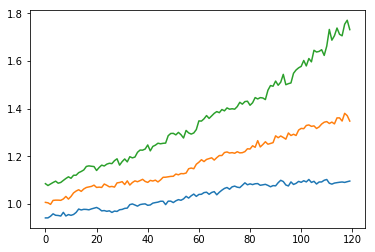

In [983]:
plt.plot( np.quantile( ptf_vals, 0.25, axis=1 ) )
plt.plot( np.quantile( ptf_vals, 0.50, axis=1 ) )
plt.plot( np.quantile( ptf_vals, 0.75, axis=1 ) )

In [985]:
print( [ cash_rtns.mean() * 12, cash_rtns.std() * np.sqrt(12) ] )
print( [ stock_rtns.mean() * 12, stock_rtns.std() * np.sqrt(12) ] )

[0.01, 0.0]
[0.05820315824326509, 0.15093626790211506]
